## Preprocessing for the third model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [3]:
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [4]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(['EIN','NAME','SPECIAL_CONSIDERATIONS','STATUS'], axis=1)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [14]:
# Review of the statistics for the ASK_AMT column
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [13]:
# Exact maximum value for the ASK_AMT column
application_df['ASK_AMT'].max()

8597806340

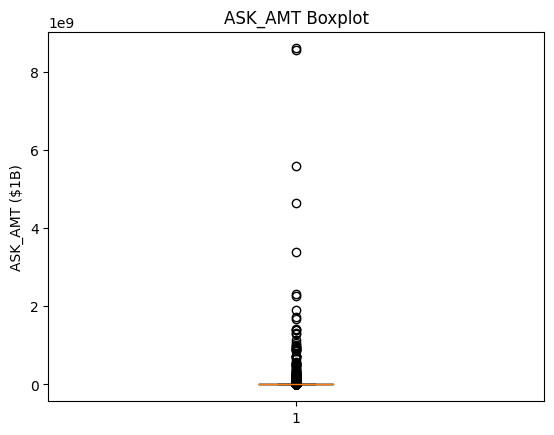

In [12]:
# Visual representation of the distribution with a boxplot
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
fig1, ax1 = plt.subplots()
ax1.set_title('ASK_AMT Boxplot')
ax1.set_ylabel('ASK_AMT ($1B)')
ax1.boxplot(application_df['ASK_AMT'])
plt.show()

In [24]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(application_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [_ for _ in application_df['ASK_AMT'] if _ < lower_bound or _ > upper_bound]
# potential_outliers

In [25]:
len(potential_outliers)

8206

In [26]:
min(potential_outliers)

11886

In [10]:
# Binning of the distribution of the ASK_AMT column for an histogram representation
counts, bins = np.histogram(application_df['ASK_AMT'])
print(counts, bins)


[34272    18     4     1     0     1     1     0     0     2] [5.00000000e+03 8.59785134e+08 1.71956527e+09 2.57934540e+09
 3.43912554e+09 4.29890567e+09 5.15868580e+09 6.01846594e+09
 6.87824607e+09 7.73802621e+09 8.59780634e+09]


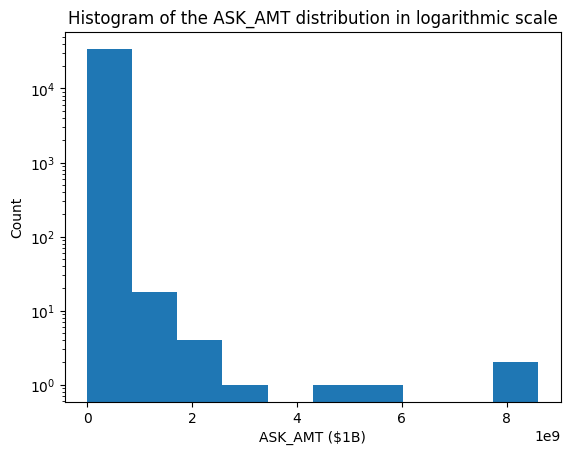

In [36]:
# Histogram of the ASK_AMT distribution in logarithmic scale
plt.hist(application_df['ASK_AMT'], histtype='bar', bins=10, log=True)
plt.title("Histogram of the ASK_AMT distribution in logarithmic scale")
plt.xlabel("ASK_AMT ($1B)")
plt.ylabel("Count")
plt.show()

In [27]:
# Count of successful outcomes for the high $$ applications
application_df[application_df['ASK_AMT']>=11886]['IS_SUCCESSFUL'].value_counts()

1    4525
0    3681
Name: IS_SUCCESSFUL, dtype: int64

In [37]:
# Count of successful outcomes for the high $$ applications
application_df[application_df['ASK_AMT']>100000000]['IS_SUCCESSFUL'].value_counts()

0    68
1    33
Name: IS_SUCCESSFUL, dtype: int64

In [38]:
# Transformation of the ASK_AMT column to its log
application_df['ASK_AMT (log)']=np.log10(application_df['ASK_AMT'])

In [39]:
application_df['ASK_AMT (log)'].describe()

count    34299.000000
mean         4.087593
std          0.810174
min          3.698970
25%          3.698970
50%          3.698970
75%          3.888853
max          9.934388
Name: ASK_AMT (log), dtype: float64

In [40]:
# Drop the ASK_AMT values from the dataframe
application_df.drop(["ASK_AMT"],axis=1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL,ASK_AMT (log)
0,T10,Independent,C1000,ProductDev,Association,0,1,3.698970
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,1,5.035790
2,T5,CompanySponsored,C3000,ProductDev,Association,0,0,3.698970
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,1,3.825556
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,1,5.154089
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,0,3.698970
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,0,3.698970
34296,T3,CompanySponsored,C2000,Preservation,Association,0,0,3.698970
34297,T5,Independent,C3000,ProductDev,Association,0,1,3.698970


In [41]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff=200
application_types_to_replace=[]
for _ in application_df['APPLICATION_TYPE'].unique():
    result=application_df[application_df['APPLICATION_TYPE']==_].count()
    if result[0]<cutoff:
        application_types_to_replace.append(_)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [42]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff2=1800
classifications_to_replace=[]
for _ in application_df['CLASSIFICATION'].unique():
    result2=application_df[application_df['CLASSIFICATION']==_].count()
    if result2[0]<cutoff2:
        classifications_to_replace.append(_)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [43]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies=pd.get_dummies(application_df, dtype=int)

In [44]:
application_dummies.info()      # TO BE REMOVED

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ASK_AMT                       34299 non-null  int64  
 1   IS_SUCCESSFUL                 34299 non-null  int64  
 2   ASK_AMT (log)                 34299 non-null  float64
 3   APPLICATION_TYPE_Other        34299 non-null  int64  
 4   APPLICATION_TYPE_T10          34299 non-null  int64  
 5   APPLICATION_TYPE_T19          34299 non-null  int64  
 6   APPLICATION_TYPE_T3           34299 non-null  int64  
 7   APPLICATION_TYPE_T4           34299 non-null  int64  
 8   APPLICATION_TYPE_T5           34299 non-null  int64  
 9   APPLICATION_TYPE_T6           34299 non-null  int64  
 10  APPLICATION_TYPE_T7           34299 non-null  int64  
 11  APPLICATION_TYPE_T8           34299 non-null  int64  
 12  AFFILIATION_CompanySponsored  34299 non-null  int64  
 13  A

In [45]:
# Split our preprocessed data into our features and target arrays

y = application_df["IS_SUCCESSFUL"].values
X = application_dummies.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
len(X_train[0])

41

## Compile, Train and Evaluate the Model

Third model:

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(input_dim=number_input_features, units=hidden_nodes_layer1, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3360      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5821 (22.74 KB)
Trainable params: 5821 (22.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5694 - accuracy: 0.7213
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7315
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7325
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5458 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5455 - accuracy: 0.7333
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accuracy: 0.7339
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5437 - accura

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5659 - accuracy: 0.7258 - 498ms/epoch - 2ms/step
Loss: 0.5659462809562683, Accuracy: 0.7258309125900269


In [52]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# Was a missing package in Colab.
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.7 MB/s eta 0:00:00


Fourth optimization test with a more complex Tuner

In [58]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model2(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=41))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=hp.Choice('activation',['relu','tanh','sigmoid'])))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [59]:
# Import the kerastuner library
import keras_tuner as kt

tuner2 = kt.Hyperband(
    create_model2,
    objective="val_accuracy",
    max_epochs=40,
    directory="project_3",
    hyperband_iterations=2)

Reloading Tuner from project_3/untitled_project/tuner0.json


In [60]:
# Run the kerastuner search for best hyperparameters
tuner2.search(X_train_scaled,y_train,epochs=40,validation_data=(X_test_scaled,y_test))

Trial 174 Complete [00h 01m 32s]
val_accuracy: 0.7300291657447815

Best val_accuracy So Far: 0.7341107726097107
Total elapsed time: 01h 18m 19s


In [63]:
# Get the optimal hyperparameters
best_hps= tuner2.get_best_hyperparameters(1)[0]

# get the best model
best_model = tuner2.get_best_models(1)[0]

In [64]:
print(best_hps.values)

{'activation': 'sigmoid', 'first_units': 26, 'num_layers': 3, 'units_0': 26, 'units_1': 1, 'units_2': 1, 'units_3': 11, 'units_4': 21, 'tuner/epochs': 14, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0137'}


In [65]:
# Evaluate best model against full test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5784 - accuracy: 0.7341 - 576ms/epoch - 2ms/step
Loss: 0.5784058570861816, Accuracy: 0.7341107726097107


In [66]:
# Export our model to HDF5 file
best_model.save('AlphabetSoupCharity_Optimization3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
